**Gurvir Boparai, 217797457**

**Ishan Ojha, 216474868**

# Problem Statement:
The problem we aim to address is the necessity of early detection of heart failure in individuals, which can be crucial for their overall health and well-being. By leveraging machine learning techniques to analyze clinical features and build a predictive model, we seek to classify individuals as being at risk of experiencing heart failure. This model aims to assist healthcare professionals in identifying at-risk individuals sooner, enabling timely interventions and potentially improving patient outcomes.

## 1. Loading the dataset
Load the csv file from the data folder into a pandas dataframe, then visualize the first 5 rows.

In [21]:
import pandas as pd

# load the dataset
df = pd.read_csv('data/heart.csv')

# display the first 5 rows
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2. Exploring the data
Taking a look at what the data looks like, as well visualizing our data with different plots.

In [22]:
# print concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [23]:
# generate descriptive statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Splitting the numeric and categorical features to further look at plots

In [24]:
# create lists of features
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Look at histograms of our numeric features

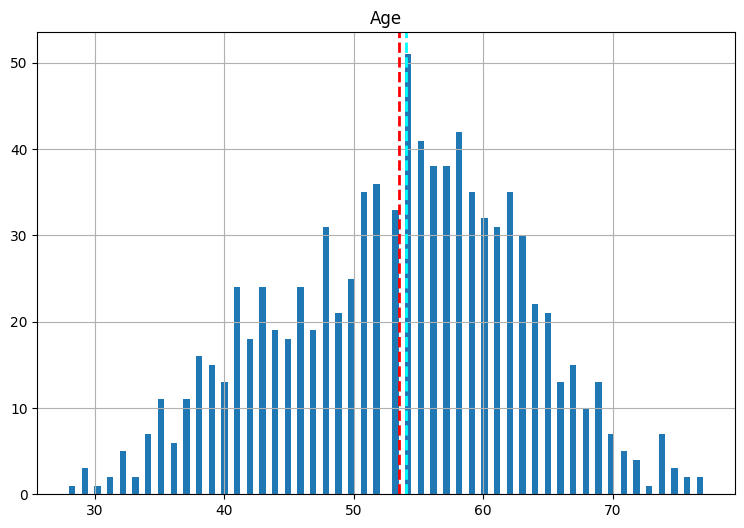

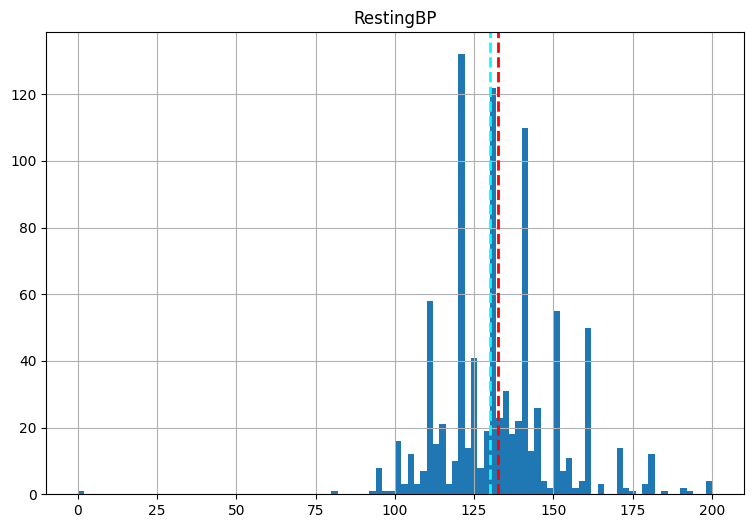

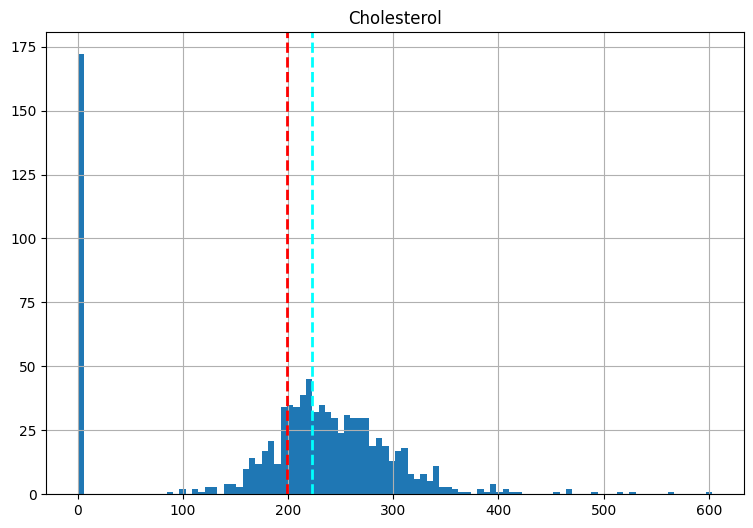

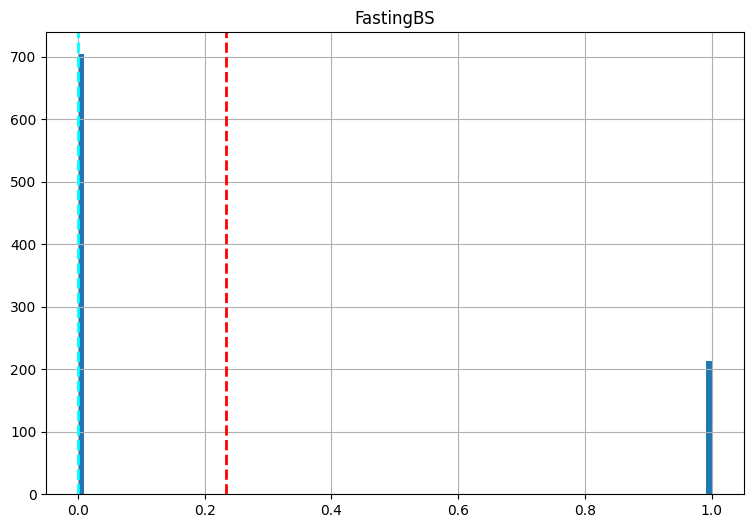

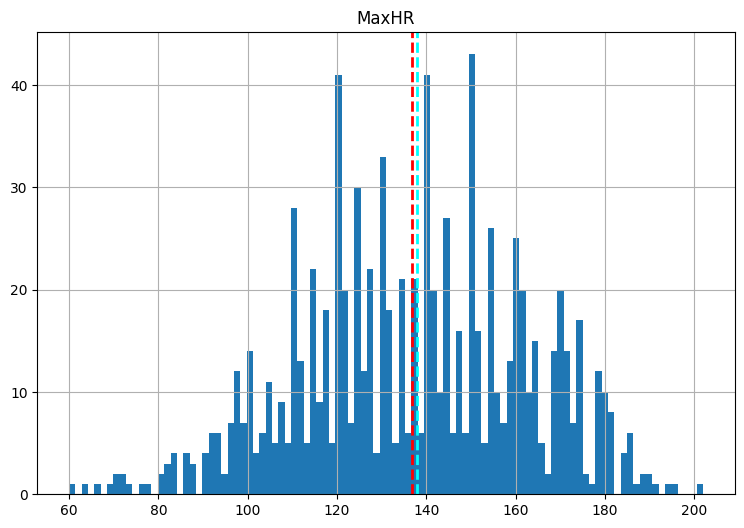

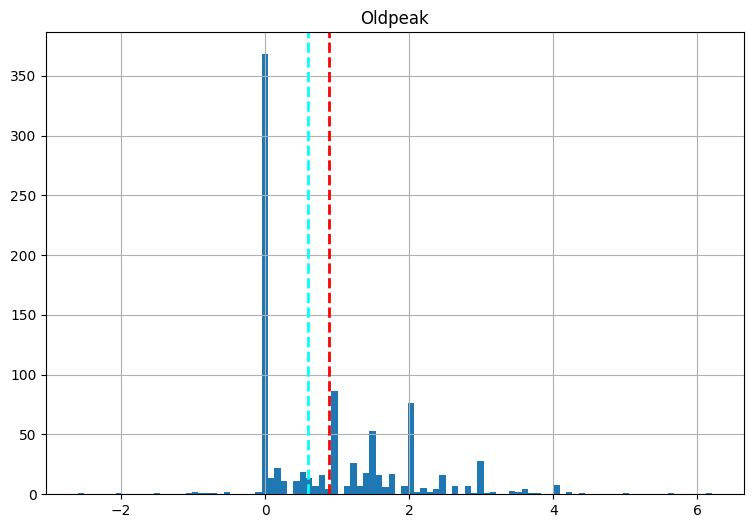

In [25]:
import matplotlib.pyplot as plt

# create a function to plot each feature
def plot_histogram(df, col):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col] # store column names from our dataframe
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2) # the mean line which will be red
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) # the median line which will be cyan
    ax.set_title(col)

# this will display a histogram for each of the numeric features listed in the data
for col in numeric_features:
    plot_histogram(df, col)

Create boxplots for further investigation of our numeric features, this time we group by HeartDisease (0 meaning Normal, 1 meaning Heart Disease)

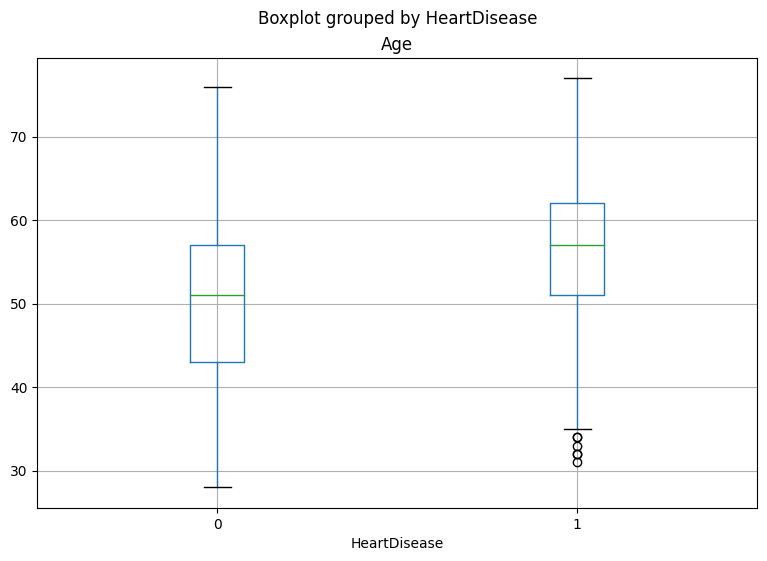

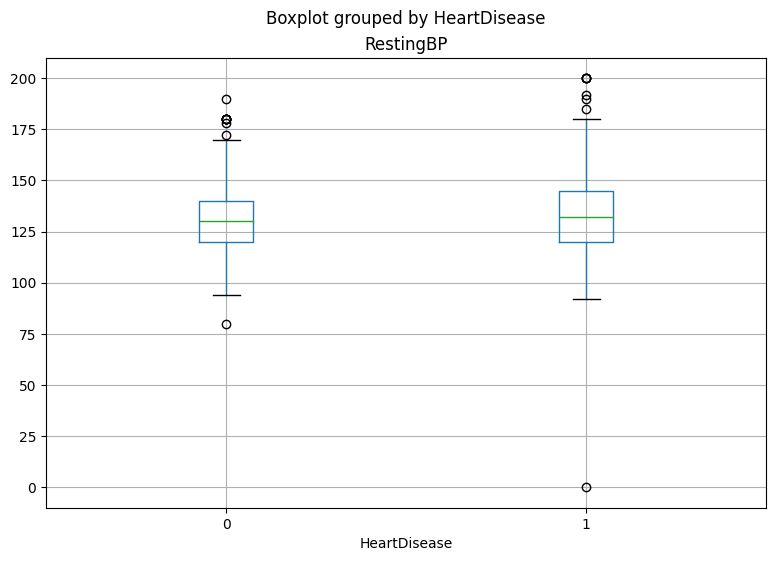

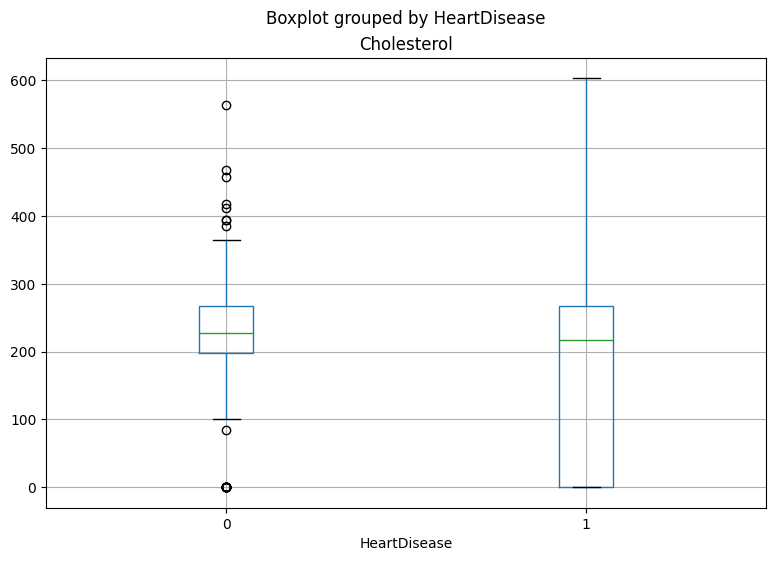

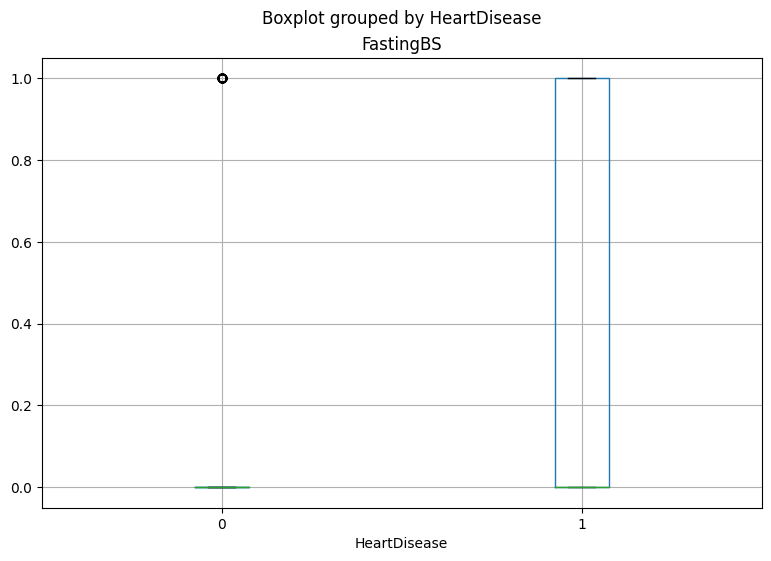

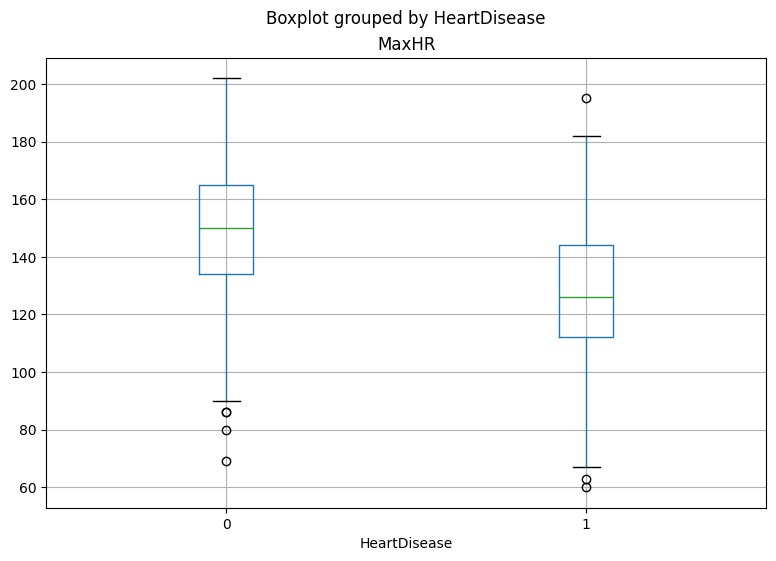

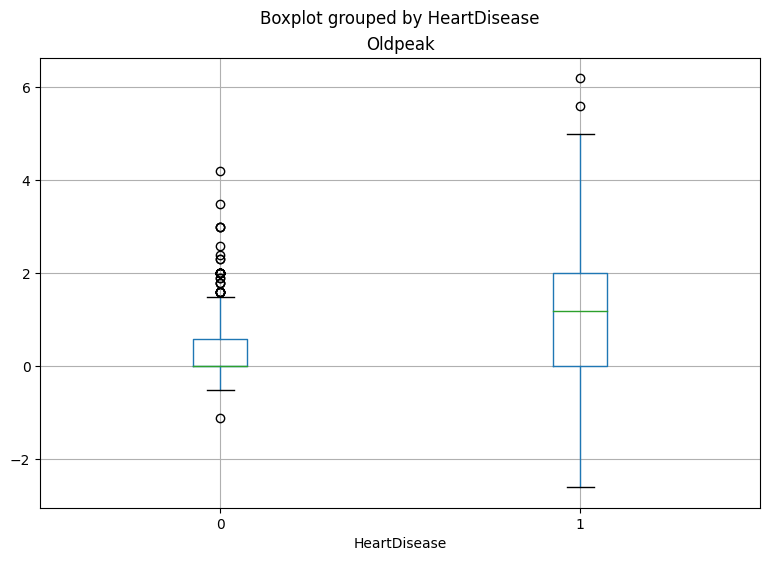

In [26]:
# create a function to plot each feature
def plot_boxplot(df, col):
    fig = plt.figure(figsize=(9, 6)) # create a new figure
    ax = fig.gca() # gets the axes of the figure 
    df.boxplot(column=col, by="HeartDisease", ax=ax) # create boxplot grouped by HeartDisease
    plt.title(col)
    plt.show()

# loop through each numeric feature and display a boxplot grouped by HeartDisease
for col in numeric_features:
    plot_boxplot(df, col)

Using barcharts to compare our categorical variables grouped by HeartDisease (0 meaning Normal, 1 meaning Heart Disease)

Red on the chart indicates heart disease, whereas cyan indicates normal.

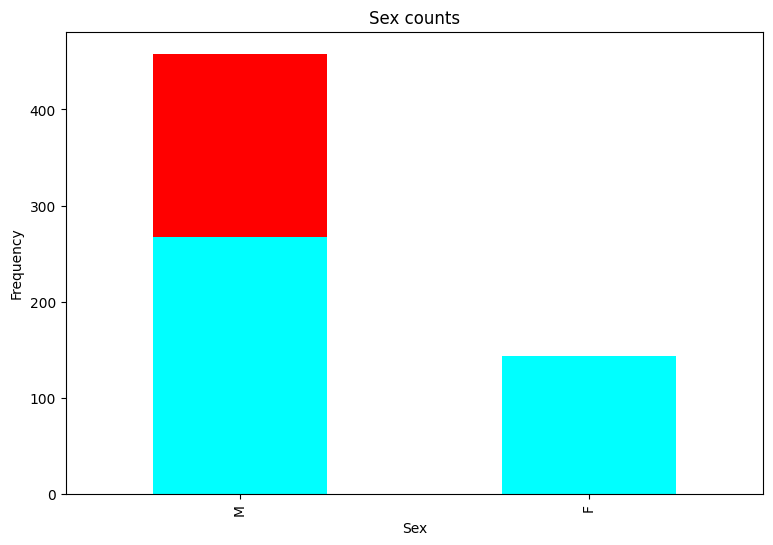

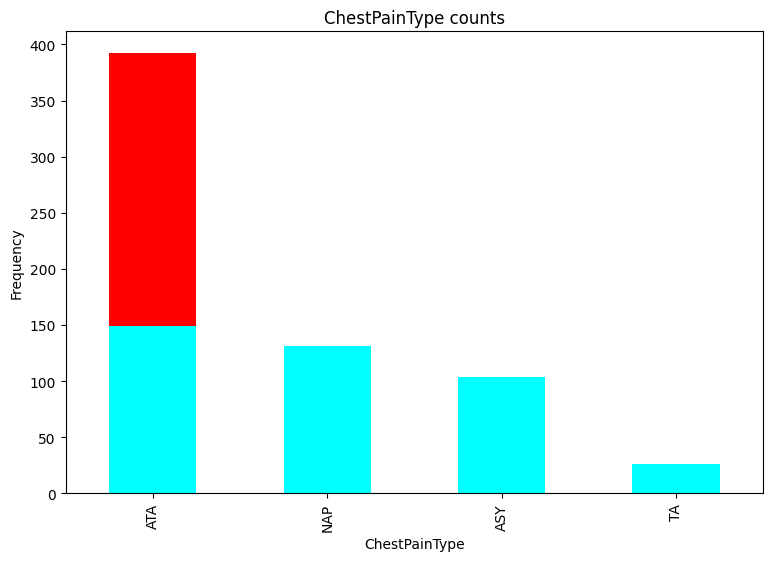

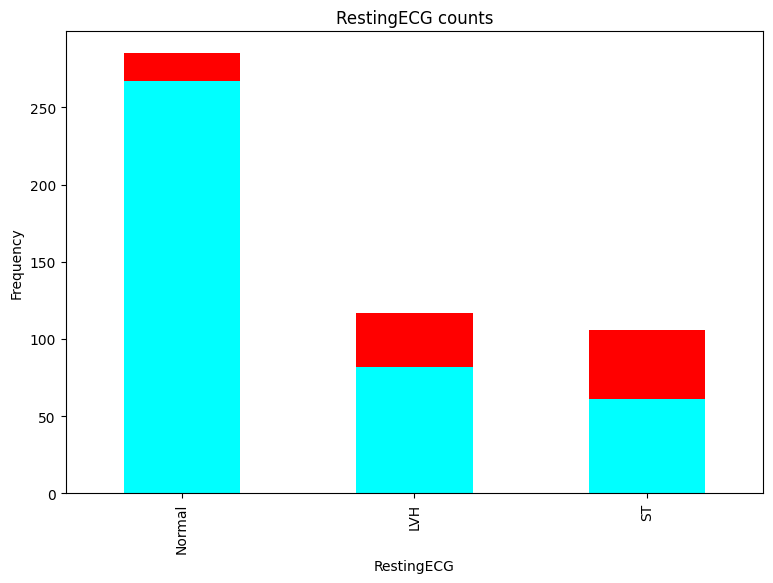

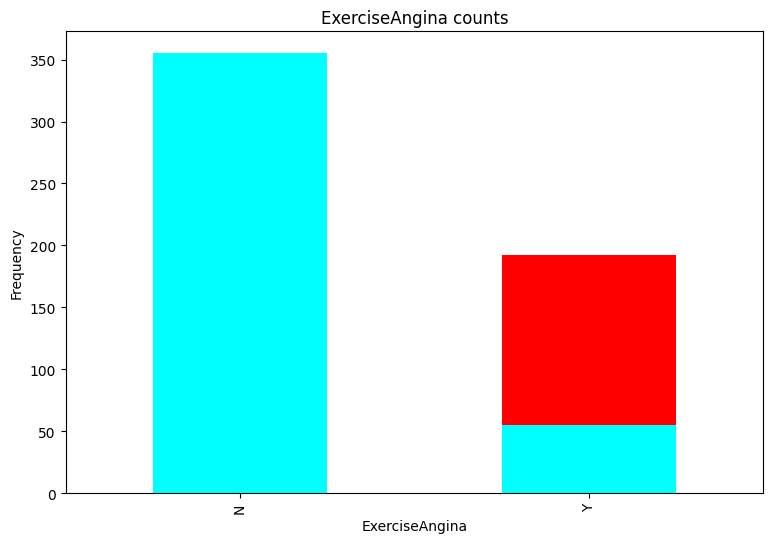

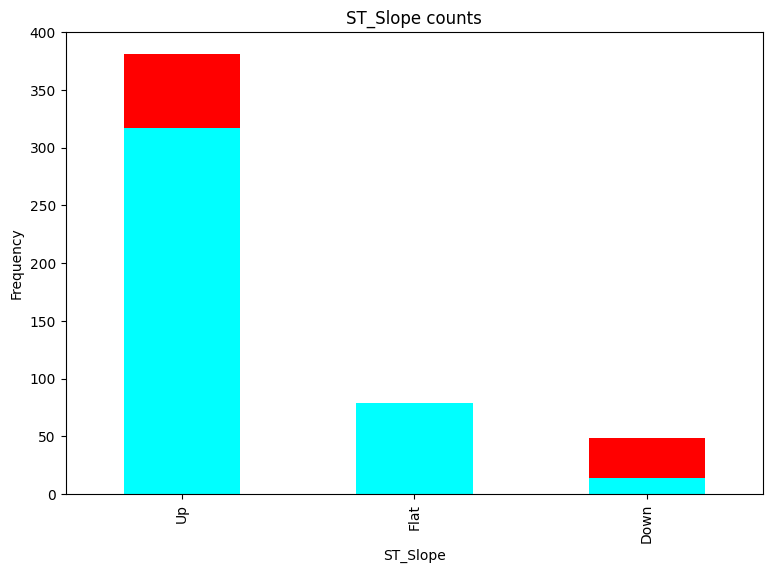

In [27]:
# create a function to plot each feature
def plot_barchart(df, col):
    heartDisease = df[df['HeartDisease'] == 1][col].value_counts()
    normal = df[df['HeartDisease'] == 0][col].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    heartDisease.plot.bar(ax = ax, color='red')
    normal.plot.bar(ax = ax, color='cyan')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

# loop through each categorical feature and display a bar chart of counts for each category
for col in categorical_features:
    plot_barchart(df, col)

Let's take a look at correlation between different the numeric variables

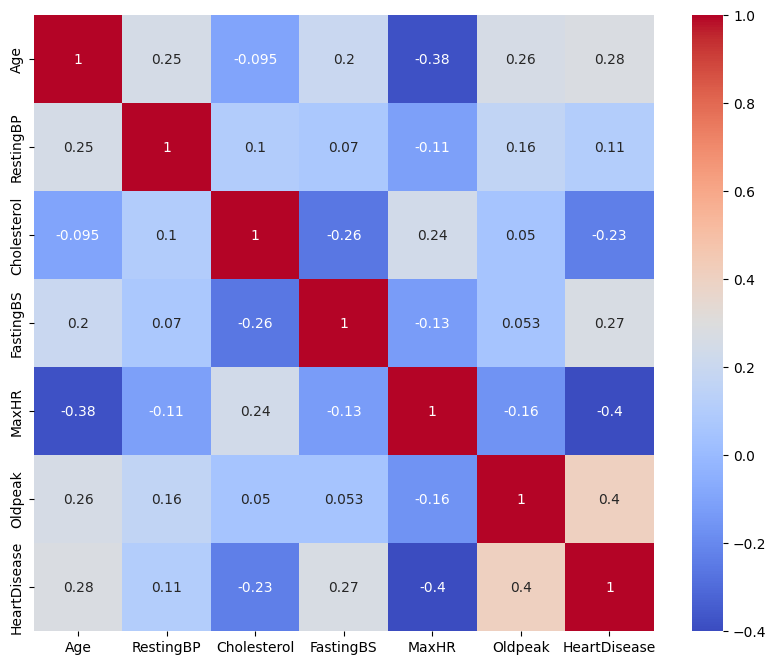

In [28]:
import numpy as np
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



---

**Some key takeaways from our exploratory step**

---

## 3. Preprocessing Data
We will clean and solve potential issues in the data.

In [29]:
# handle missing values
print(df.isnull().sum()) # get the count of any null points in the data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Handle outliers using the IQR

In [37]:
# Calculate the IQR for each numeric feature
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for IQR (e.g., 1.5) to identify outliers
outlier_threshold_iqr = 1.5

# Create a mask for outliers using IQR
outliers_iqr = ((df[numeric_features] < (Q1 - outlier_threshold_iqr * IQR)) |
                (df[numeric_features] > (Q3 + outlier_threshold_iqr * IQR)))

# Remove the outliers from the dataset
df_no_outlier = df[~outliers_iqr.any(axis=1)]

df_no_outlier.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,588.000000,588.000000,588.000000,588.0,588.000000,588.000000,588.000000
mean,51.722789,130.375850,239.064626,0.0,141.755102,0.802211,0.426871
std,9.542500,15.238699,50.738558,0.0,24.144890,0.961727,0.495044
min,28.000000,92.000000,85.000000,0.0,71.000000,-0.100000,0.000000
25%,44.750000,120.000000,205.000000,0.0,124.000000,0.000000,0.000000
50%,52.000000,130.000000,234.000000,0.0,142.000000,0.300000,0.000000
75%,58.000000,140.000000,272.000000,0.0,160.000000,1.500000,1.000000
max,77.000000,170.000000,404.000000,0.0,202.000000,3.600000,1.000000
